In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
import sympy as smp
import plotly.graph_objects as go
from IPython.display import HTML

#Electric Field Computation in Python: No Pencil/Paper Required

In [2]:
t = smp.symbols('t', positive=True)
x, y, z = smp.symbols('x y z')

In [3]:
r = smp.Matrix([x, y, z])
r_p = smp.Matrix([smp.cos(4*t), smp.sin(4*t), t])
sep = r - r_p

In [4]:
dr_pdt = smp.diff(r_p, t).norm().simplify()
lam = smp.integrate(dr_pdt, (t, 0, 2*smp.pi))
lam

2*sqrt(17)*pi

In [5]:
integrand = lam * sep/sep.norm()**3 * dr_pdt
integrand

Matrix([
[34*pi*(x - cos(4*t))/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)],
[34*pi*(y - sin(4*t))/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)],
[      34*pi*(-t + z)/(Abs(t - z)**2 + Abs(x - cos(4*t))**2 + Abs(y - sin(4*t))**2)**(3/2)]])

In [6]:
dExdt = smp.lambdify([t, x, y, z], integrand[0])
dEydt = smp.lambdify([t, x, y, z], integrand[1])
dEzdt = smp.lambdify([t, x, y, z], integrand[2])

In [7]:
def E(x, y, z):
    return np.array([quad(dExdt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dEydt, 0, 2*np.pi, args=(x, y, z))[0],
                     quad(dEzdt, 0, 2*np.pi, args=(x, y, z))[0]])

In [8]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(0, 2*np.pi, 10)
xv, yv, zv = np.meshgrid(x, y, z)

In [9]:
E_field = np.vectorize(E, signature='(),(),()->(n)')(xv, yv, zv)
Ex = E_field[:,:,:,0]
Ey = E_field[:,:,:,1]
Ez = E_field[:,:,:,2]

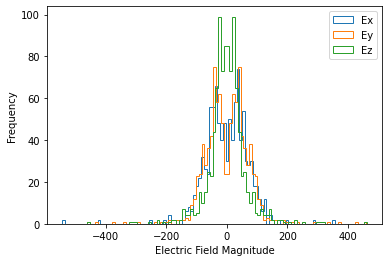

In [10]:
plt.hist(Ex.ravel(), bins=100, histtype='step',label='Ex')
plt.hist(Ey.ravel(), bins=100, histtype='step',label='Ey')
plt.hist(Ez.ravel(), bins=100, histtype='step',label='Ez')
plt.legend()
plt.xlabel('Electric Field Magnitude')
plt.ylabel('Frequency')
plt.show()

In [11]:
E_max = 150
Ex[Ex>E_max] = E_max
Ey[Ey>E_max] = E_max
Ez[Ez>E_max] = E_max

Ex[Ex<-E_max] = -E_max
Ey[Ey<-E_max] = -E_max
Ez[Ez<-E_max] = -E_max

In [12]:
tt = np.linspace(0, 2*np.pi, 1000)
lx, ly, lz = np.cos(4*tt), np.sin(4*tt), tt

In [13]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Ex.ravel(), v=Ey.ravel(), w=Ez.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="scaled", sizeref=0.5)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))

HTML(fig.to_html(default_width=1000, default_height=600))

Output hidden; open in https://colab.research.google.com to view.

In [14]:
t = smp.symbols('t')
x, y, z = smp.symbols('x y z')

In [15]:
r = smp.Matrix([x, y, z])
r_p = smp.Matrix([t, t**2, 0])
sep = r - r_p

In [16]:
lam_A = t**3
dr_pdt = smp.diff(r_p, t).norm()
A = smp.integrate(lam_A*dr_pdt, (t, 0, 1))**-1
lam = A * t**3
lam

t**3/(1/120 + 5*sqrt(5)/24)

In [17]:
integrand = lam * sep/sep.norm()**3 * dr_pdt
integrand

Matrix([
[   t**3*(-t + x)*sqrt(4*Abs(t)**2 + 1)/((1/120 + 5*sqrt(5)/24)*(Abs(z)**2 + Abs(t - x)**2 + Abs(t**2 - y)**2)**(3/2))],
[t**3*(-t**2 + y)*sqrt(4*Abs(t)**2 + 1)/((1/120 + 5*sqrt(5)/24)*(Abs(z)**2 + Abs(t - x)**2 + Abs(t**2 - y)**2)**(3/2))],
[          t**3*z*sqrt(4*Abs(t)**2 + 1)/((1/120 + 5*sqrt(5)/24)*(Abs(z)**2 + Abs(t - x)**2 + Abs(t**2 - y)**2)**(3/2))]])

In [18]:
dExdt = smp.lambdify([t, x, y, z], integrand[0])
dEydt = smp.lambdify([t, x, y, z], integrand[1])
dEzdt = smp.lambdify([t, x, y, z], integrand[2])

In [19]:
def E(x, y, z):
    return np.array([quad(dExdt, -1, 1, args=(x, y, z))[0],
                     quad(dEydt, -1, 1, args=(x, y, z))[0],
                     quad(dEzdt, -1, 1, args=(x, y, z))[0]])

In [20]:
x = np.linspace(-2, 2, 10)
xv, yv, zv = np.meshgrid(x, x, x)

In [21]:
E_field = np.vectorize(E, signature='(),(),()->(n)')(xv, yv, zv)
Ex = E_field[:,:,:,0]
Ey = E_field[:,:,:,1]
Ez = E_field[:,:,:,2]

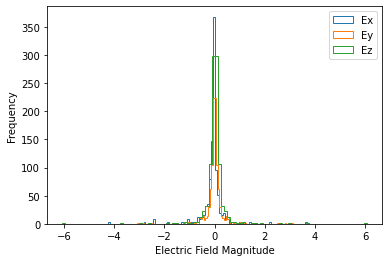

In [22]:
plt.hist(Ex.ravel(), bins=100, histtype='step',label='Ex')
plt.hist(Ey.ravel(), bins=100, histtype='step',label='Ey')
plt.hist(Ez.ravel(), bins=100, histtype='step',label='Ez')
plt.legend()
plt.xlabel('Electric Field Magnitude')
plt.ylabel('Frequency')
plt.show()

In [23]:
E_max = 2
Ex[Ex>E_max] = E_max
Ey[Ey>E_max] = E_max
Ez[Ez>E_max] = E_max

Ex[Ex<-E_max] = -E_max
Ey[Ey<-E_max] = -E_max
Ez[Ez<-E_max] = -E_max

In [24]:
tt = np.linspace(-1, 1, 1000)
lx, ly, lz = tt, tt**2, 0*tt

In [25]:
data = go.Cone(x=xv.ravel(), y=yv.ravel(), z=zv.ravel(),
               u=Ex.ravel(), v=Ey.ravel(), w=Ez.ravel(),
               colorscale='Inferno', colorbar=dict(title='$x^2$'),
               sizemode="scaled", sizeref=0.5)

layout = go.Layout(title=r'Plot Title',
                     scene=dict(xaxis_title=r'x',
                                yaxis_title=r'y',
                                zaxis_title=r'z',
                                aspectratio=dict(x=1, y=1, z=1),
                                camera_eye=dict(x=1.2, y=1.2, z=1.2)))

fig = go.Figure(data = data, layout=layout)
fig.add_scatter3d(x=lx, y=ly, z=lz, mode='lines',
                  line = dict(color='green', width=10))

HTML(fig.to_html(default_width=1000, default_height=600))

Output hidden; open in https://colab.research.google.com to view.